In [181]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, r2_score,mean_squared_error,classification_report
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile,f_regression
from sklearn.model_selection import train_test_split, GridSearchCV,KFold, cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression,ElasticNetCV,ElasticNet
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [182]:
df_train = pd.read_csv(r'/Users/allen/Desktop/MSDS/QTW/qtw_smu/Case Study 1/superconduct/train.csv')
df_unique_m = pd.read_csv(r'/Users/allen/Desktop/MSDS/QTW/qtw_smu/Case Study 1/superconduct/unique_m.csv')


In [183]:
#merge two dataframes on indexes
df_merge = pd.merge(df_train, df_unique_m, left_index=True, right_index=True)

In [184]:
#delete duplicate and unused column
df_merge = df_merge.drop(['critical_temp_y','material'], axis=1)

#rename column from merge
df_merge.rename(columns = {'critical_temp_x':'critical_temp'}, inplace = True)

In [185]:
df_merge.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  wtd_std_atomic_mass  mean_fie  wtd_mean_fie   gmean_fie  \
0        51.968828            53.622535   775.425   1010.268571  718.152900   
1        47.094633            53.979870   766.440   1010.612857  720.605511   
2        51.968828            53.656268   775.425   1010.820000  718.152900   
3        51.968828            53.639405   775.425   1010.544286  718.152900   
4        51.968828            53.588771   775.425   1009.717143  718.152900   

   wtd_gmean_fie  entropy_fie  wtd_entropy_fie  range_fie  wtd_range_fie  \
0     938.016780     1.305967         0.791488      810.6     735.985714   
1     938.745413     1.544145         0.807078      810.6     743.164286   
2     939.009036     1.305967         0.773620      810.6     743.164286   
3     938.512777     1.305967         0.783207      810.6     739.575000   
4     937.025573     1.305967         0.805230      810.6     728.807143   

      std_fie  wtd_std_fie  mean_atomic_radius  wtd_mean_atomic_radius  \
0  323.811808   355.562967              160.25              105.514286   
1  290.183029   354.963511              161.20              104.971429   
2  323.811808   354.804183              160.25              104.685714   
3  323.811808   355.183884              160.25              105.100000   
4  323.811808   356.319281              160.25              106.342857   

   gmean_atomic_radius  wtd_gmean_atomic_radius  entropy_atomic_radius  \
0           136.126003                84.528423               1.259244   
1           141.465215                84.370167               1.508328   
2           136.126003                84.214573               1.259244   
3           136.126003                84.371352               1.259244   
4           136.126003                84.843442               1.259244   

   wtd_entropy_atomic_radius  range_atomic_radius  wtd_range_atomic_radius  \
0                   1.207040                  205                42.914286   
1                   1.204115                  205                50.571429   
2                   1.132547                  205                49.314286   
3                   1.173033                  205                46.114286   
4                   1.261194                  205                36.514286   

   std_atomic_radius  wtd_std_atomic_radius  mean_Density  wtd_mean_Density  \
0          75.237540              69.235569    4654.35725       2961.502286   
1          67.321319              68.008817    5821.48580       3021.016571   
2          75.237540              67.797712    4654.35725       2999.159429   
3          75.237540              68.521665    4654.35725       2980.330857   
4          75.237540              70.634448    4654.35725       2923.845143   

   g

In [186]:
#show all columns..
pd.set_option('display.max_columns', None)

In [187]:
df_train.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  wtd_std_atomic_mass  mean_fie  wtd_mean_fie   gmean_fie  \
0        51.968828            53.622535   775.425   1010.268571  718.152900   
1        47.094633            53.979870   766.440   1010.612857  720.605511   
2        51.968828            53.656268   775.425   1010.820000  718.152900   
3        51.968828            53.639405   775.425   1010.544286  718.152900   
4        51.968828            53.588771   775.425   1009.717143  718.152900   

   wtd_gmean_fie  entropy_fie  wtd_entropy_fie  range_fie  wtd_range_fie  \
0     938.016780     1.305967         0.791488      810.6     735.985714   
1     938.745413     1.544145         0.807078      810.6     743.164286   
2     939.009036     1.305967         0.773620      810.6     743.164286   
3     938.512777     1.305967         0.783207      810.6     739.575000   
4     937.025573     1.305967         0.805230      810.6     728.807143   

      std_fie  wtd_std_fie  mean_atomic_radius  wtd_mean_atomic_radius  \
0  323.811808   355.562967              160.25              105.514286   
1  290.183029   354.963511              161.20              104.971429   
2  323.811808   354.804183              160.25              104.685714   
3  323.811808   355.183884              160.25              105.100000   
4  323.811808   356.319281              160.25              106.342857   

   gmean_atomic_radius  wtd_gmean_atomic_radius  entropy_atomic_radius  \
0           136.126003                84.528423               1.259244   
1           141.465215                84.370167               1.508328   
2           136.126003                84.214573               1.259244   
3           136.126003                84.371352               1.259244   
4           136.126003                84.843442               1.259244   

   wtd_entropy_atomic_radius  range_atomic_radius  wtd_range_atomic_radius  \
0                   1.207040                  205                42.914286   
1                   1.204115                  205                50.571429   
2                   1.132547                  205                49.314286   
3                   1.173033                  205                46.114286   
4                   1.261194                  205                36.514286   

   std_atomic_radius  wtd_std_atomic_radius  mean_Density  wtd_mean_Density  \
0          75.237540              69.235569    4654.35725       2961.502286   
1          67.321319              68.008817    5821.48580       3021.016571   
2          75.237540              67.797712    4654.35725       2999.159429   
3          75.237540              68.521665    4654.35725       2980.330857   
4          75.237540              70.634448    4654.35725       2923.845143   

   g

In [188]:
df_unique_m.head()

H  He   Li   Be    B    C    N    O    F  Ne   Na   Mg   Al   Si    P  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   

     S   Cl  Ar    K   Ca   Sc   Ti    V   Cr   Mn   Fe   Co   Ni   Cu   Zn  \
0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.9  0.0   
2  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
3  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

    Ga   Ge   As   Se   Br  Kr   Rb   Sr    Y   Zr   Nb   Mo   Tc   Ru   Rh  \
0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    Pd   Ag   Cd   In   Sn   Sb   Te    I  Xe   Cs    Ba    La   Ce   Pr   Nd  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.20  1.80  0.0  0.0  0.0   
1  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.10  1.90  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.10  1.90  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.15  1.85  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.30  1.70  0.0  0.0  0.0   

   Pm   Sm   Eu   Gd   Tb   Dy   Ho   Er   Tm   Yb   Lu   Hf   Ta    W   Re  \
0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    Os   Ir   Pt   Au   Hg   Tl   Pb   Bi  Po  At  Rn  critical_temp  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           29.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           26.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           19.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           22.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           23.0   

                 material  
0         Ba0.2La1.8Cu1O4  
1  Ba0.1La1.9Ag0.1Cu0.9O4  
2         Ba0.1La1.9Cu1O4  
3       Ba0.15La1.85Cu1O4  
4         Ba0.3La1.7Cu1O4

In [189]:
df_train_shape = df_train.shape
df_unique_m_shape = df_unique_m.shape
df_merge_shape = df_merge.shape
print(f'Train DataFrame Shape: {df_train_shape}')
print(f'Unique_m DataFrame Shape:{df_unique_m_shape}')
print(f'Merged DataFrame Shape:{df_merge_shape}')

Train DataFrame Shape: (21263, 82)
Unique_m DataFrame Shape:(21263, 88)
Merged DataFrame Shape:(21263, 168)


In [190]:
df_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [191]:
df_unique_m.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              21263 non-null  float64
 1   He             21263 non-null  int64  
 2   Li             21263 non-null  float64
 3   Be             21263 non-null  float64
 4   B              21263 non-null  float64
 5   C              21263 non-null  float64
 6   N              21263 non-null  float64
 7   O              21263 non-null  float64
 8   F              21263 non-null  float64
 9   Ne             21263 non-null  int64  
 10  Na             21263 non-null  float64
 11  Mg             21263 non-null  float64
 12  Al             21263 non-null  float64
 13  Si             21263 non-null  float64
 14  P              21263 non-null  float64
 15  S              21263 non-null  float64
 16  Cl             21263 non-null  float64
 17  Ar             21263 non-null  int64  
 18  K     

In [192]:
df_merge.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 168 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    number_of_elements               int64  
 1    mean_atomic_mass                 float64
 2    wtd_mean_atomic_mass             float64
 3    gmean_atomic_mass                float64
 4    wtd_gmean_atomic_mass            float64
 5    entropy_atomic_mass              float64
 6    wtd_entropy_atomic_mass          float64
 7    range_atomic_mass                float64
 8    wtd_range_atomic_mass            float64
 9    std_atomic_mass                  float64
 10   wtd_std_atomic_mass              float64
 11   mean_fie                         float64
 12   wtd_mean_fie                     float64
 13   gmean_fie                        float64
 14   wtd_gmean_fie                    float64
 15   entropy_fie                      float64
 16   wtd_entropy_fie                  float

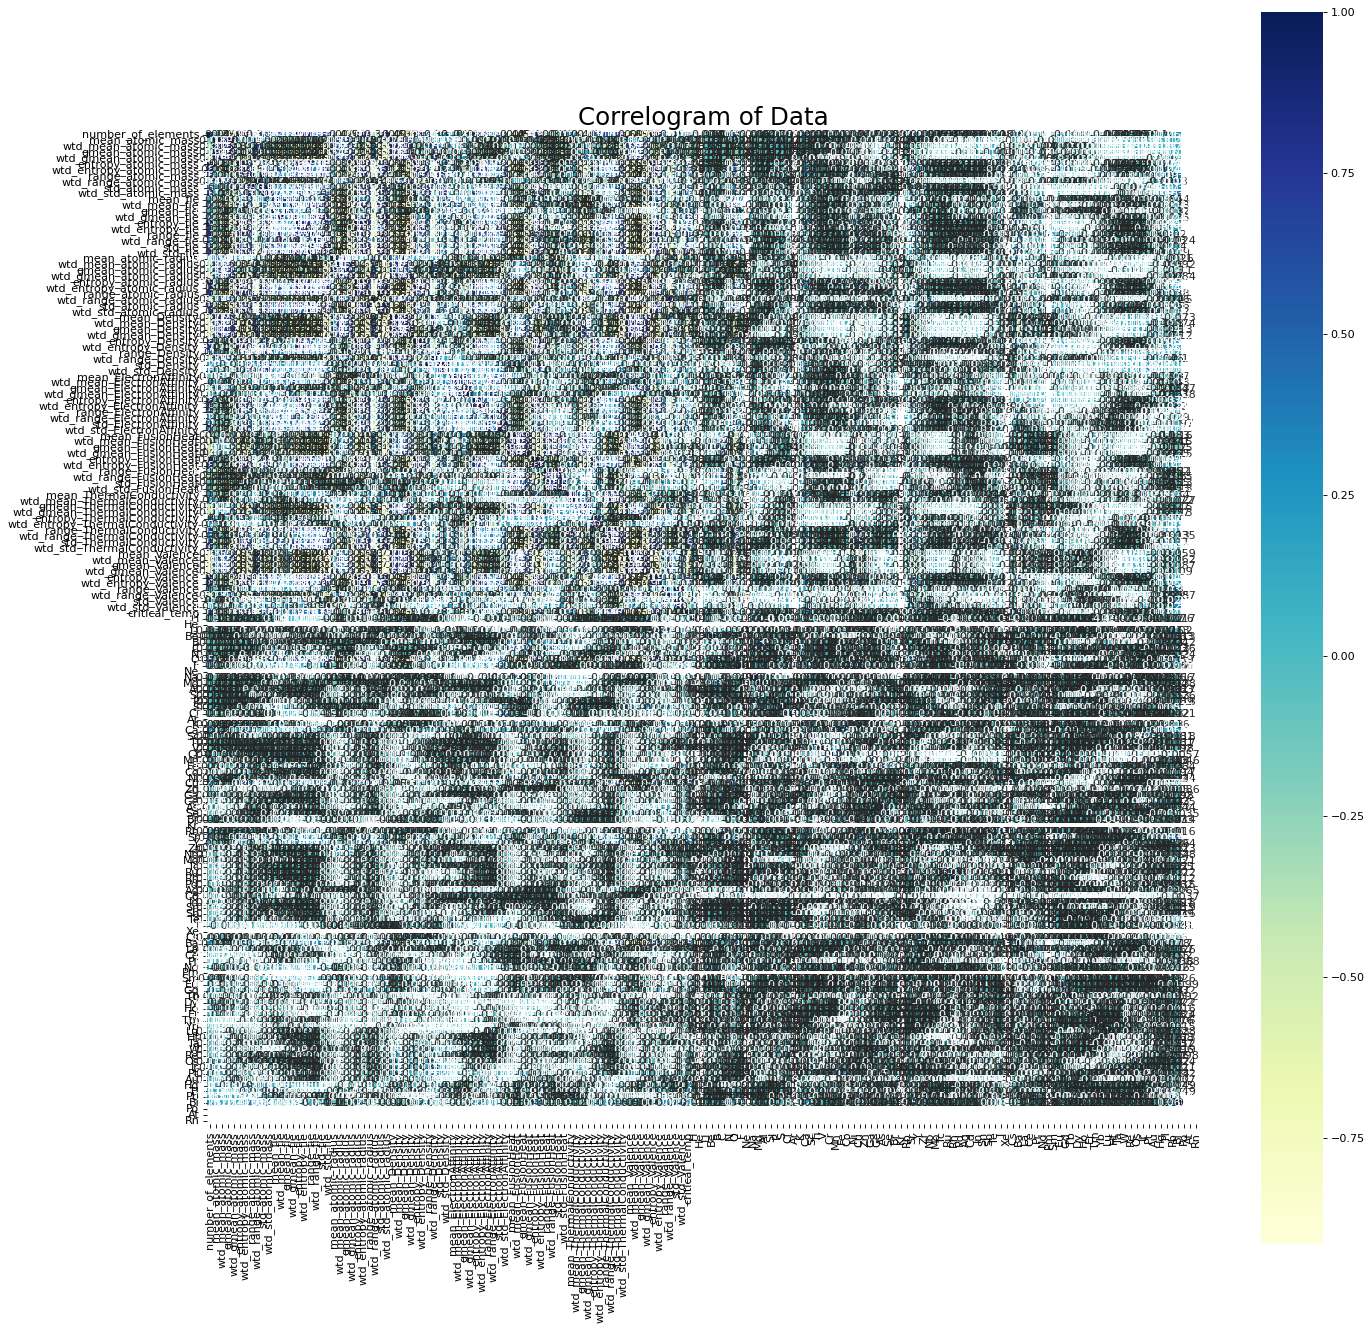

In [193]:
# plotting Correlogram of numerical columns
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(df_merge.corr(),
            xticklabels=df_merge.corr().columns,
            yticklabels=df_merge.corr().columns,
            cmap = "YlGnBu",
            square = True,
            annot=True,
            annot_kws={"size":10}
           )

# addting titles and font sizes
plt.title('Correlogram of Data', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [194]:
df_merge.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.248990             0.966676   
50%            66.361592              39.918385             1.199541   
75%            78.116681              73.113234             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21263.000000       21263.000000           21263.000000   
mean                  1.063884         115.601251              33.225218   
std                   0.401423          54.626887              26.967752   
min                   0.000000           0.000000               0.000000   
25%                   0.775363          78.512902              16.824174   
50%                   1.146783         122.906070              26.636008   
75%                   1.359418         154.119320              38.356908   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  wtd_std_atomic_mass      mean_fie  wtd_mean_fie  \
count     21263.000000         21263.000000  21263.000000  21263.000000   
mean         44.391893            41.448045    769.614748    870.442317   
std          20.035430            19.983544     87.488694    143.278200   
min           0.000000             0.000000    375.500000    375.500000   
25%          32.890369            28.539377    723.740000    738.946339   
50%          45.123500            44.285984    764.900000    889.966667   
75%          59.322812            53.629284    796.320000   1004.117384   
max         101.019700           101.019700   1313.100000   1348.028986   

          gmean_fie  wtd_gmean_fie   entropy_fie  wtd_entropy_fie  \
count  21263.000000   21263.000000  21263.000000     21263.000000   
mean     737.474751     832.769649      1.299172         0.926726   
std       78.327275     119.772520      0.381935         0.334018   
min      375.500000     375.500000      0.000000         0.000000   
25%      692.541331     720.108284      1.085871         0.753757   
50%      727.960610     856.202765      1.356236         0.916843   
75%      765.715174     937.575826      1.551120         1.061750   
max     1313.100000    1327.593381      2.157777         2.038560   

          range_fie  wtd_range_fie       std_fie   wtd_std_fie  \
count  21263.000000   21263.000000  21263.000000  21263.000000   
mean     572.222612     483.517264    215.631279    224.050033   
std      309.614442     224.042874    109.966774    127.927104   
min        0.000000       0.000000      0.000000      0.000000   
25%      262.400000     291.088889    114.135763     92.994286   
50%      764.100000     510.440000    266.373871    258.449503   
75%      810.600000     690.703310    297.724924    342.656991   
max     1304.500000    1251.855072    499.671949    479.162305   

       mean_atomic_radius  wtd_mean_atomic_radius  gmean_atomic_radius  \
count        21263.000000            21263.000000         21263.000000   
mean      

## Begin Modeling

In [195]:
# Subset of columns to transform

sc = StandardScaler()
# Overwrite old columns with transformed columns
df_scaled = pd.DataFrame(sc.fit_transform(df_merge),columns = df_merge.columns)

In [196]:
#Specififying Stratified Kfold for cv.
kfcv = KFold(n_splits=10,random_state=0,shuffle=True)


In [197]:
lr = LinearRegression(n_jobs=-1)
target_col = ['critical_temp']
feature_cols = df_scaled.loc[:, ~df_scaled.columns.isin(target_col)].columns
y = df_scaled.critical_temp
X = df_scaled[feature_cols]

In [198]:
df_scaled.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0           -0.080058          0.046733             -0.451651   
1            0.614744          0.174269             -0.432071   
2           -0.080058          0.046733             -0.450978   
3           -0.080058          0.046733             -0.451314   
4           -0.080058          0.046733             -0.452324   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          -0.158850              -0.611819             0.044358   
1           0.059368              -0.604180             0.777430   
2          -0.158850              -0.611658             0.044358   
3          -0.158850              -0.611739             0.044358   
4          -0.158850              -0.611980             0.044358   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                -0.003707           0.133725              -0.053039   
1                -0.015267           0.133725               0.108900   
2                -0.218984           0.133725               0.093294   
3                -0.103615           0.133725               0.020128   
4                 0.162775           0.133725              -0.199372   

   std_atomic_mass  wtd_std_atomic_mass  mean_fie  wtd_mean_fie  gmean_fie  \
0         0.378186             0.609240  0.066413      0.975930  -0.246687   
1         0.134901             0.627122 -0.036288      0.978333  -0.215374   
2         0.378186             0.610928  0.066413      0.979779  -0.246687   
3         0.378186             0.610084  0.066413      0.977855  -0.246687   
4         0.378186             0.607550  0.066413      0.972082  -0.246687   

   wtd_gmean_fie  entropy_fie  wtd_entropy_fie  range_fie  wtd_range_fie  \
0       0.878746     0.017791        -0.404893   0.769935       1.126902   
1       0.884829     0.641414        -0.358216   0.769935       1.158944   
2       0.887031     0.017791        -0.458387   0.769935       1.158944   
3       0.882887     0.017791        -0.429686   0.769935       1.142923   
4       0.870470     0.017791        -0.363750   0.769935       1.094860   

    std_fie  wtd_std_fie  mean_atomic_radius  wtd_mean_atomic_radius  \
0  0.983780     1.028054            0.112519               -1.014057   
1  0.677964     1.023368            0.159673               -1.032906   
2  0.983780     1.022123            0.112519               -1.042826   
3  0.983780     1.025091            0.112519               -1.028442   
4  0.983780     1.033967            0.112519               -0.985288   

   gmean_atomic_radius  wtd_gmean_atomic_radius  entropy_atomic_radius  \
0            -0.376757                -1.017410              -0.022674   
1            -0.135059                -1.021826               0.640837   
2            -0.376757                -1.026167              -0.022674   
3            -0.376757                -1.021792              -0.022674   
4            -0.376757                -1.008619              -0.022674   

   wtd_entropy_atomic_radius  range_atomic_radius  wtd_range_atomic_radius  \
0                   0.186424              0.97628                -0.241461   
1                   0.179239              0.97628                -0.022801   
2                   0.003461              0.97628                -0.058700   
3                   0.102899              0.97628                -0.150081   
4                   0.319431              0.97628                -0.424221   

   std_atomic_radius  wtd_std_atomic_radius  mean_Density  wtd_mean_Density  \
0           1.032248               0.667951     -0.511855         -0.715776   
1           0.686529               0.619451     -0.101864         -0.697301   
2           1.032248               0.611105     -0.511855         -0.704086   
3           1.032248               0.639727     -0.511855         -0.709931   
4           1.032248               0.723256     -0.511855         -0.727467   

   gmean_Density  wtd_

In [199]:
#create test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [200]:
#checking shape of data
print('X_train shape: ',X_train.shape,'\n')
print('X_test shape: ',X_test.shape,'\n')
print('y_train shape: ',y_train.shape,'\n')
print('y_test shape: ',y_test.shape)

X_train shape:  (17010, 167) 

X_test shape:  (4253, 167) 

y_train shape:  (17010,) 

y_test shape:  (4253,)


In [201]:
%%time
# Grid search for Logistic Regression task 1

lr_grid={"l1_ratio":np.arange(0.0,1.0,0.1), 
      "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
      }

model=ElasticNet(random_state = 0)

model_gs=GridSearchCV(model,
                       lr_grid,
                       cv = kfcv,
                       n_jobs=-1,
                       verbose = 1)

model_gs.fit(X_train,y_train)

print('GridSearchCV Metrics:\n__________________________\n')
print('Tuned hpyerparameters :(best parameters) ',model_gs.best_params_)
print('Model Score :',model_gs.best_score_)
print('\nEnd GridSearchCV Metrics\n__________________________\n')

Fitting 10 folds for each of 90 candidates, totalling 900 fits


/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.794e+03, tolerance: 1.529e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.788e+03, tolerance: 1.529e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers 

GridSearchCV Metrics:
__________________________

Tuned hpyerparameters :(best parameters)  {'alpha': 0.01, 'l1_ratio': 0.2}
Accuracy : 0.7433811091040069

End GridSearchCV Metrics
__________________________

CPU times: user 8.57 s, sys: 5.44 s, total: 14 s
Wall time: 3min 2s


In [202]:
#imput GridSearch Output in Model
model = ElasticNet(l1_ratio=0.2,alpha = 0.01,random_state=0)
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

In [203]:
model_mse = (mean_squared_error(y_true=y_test,y_pred=y_predict))
print(f'Elastic Net Mean Squared Error: {model_mse}')

r2 =r2_score(y_test,y_predict)
print(f'Elastic Net R2 Score: {r2}')


Elastic Net Mean Squared Error: 0.39282948863494777
Elastic Net R2 Score: 0.6039976355165989


In [204]:
#print intercept and coefficients
lr_coef = model.coef_
lr_features_coef = pd.DataFrame(list(zip(X_train,lr_coef)))
lr_features_coef.columns = ['Feature','Coefficient']
lr_intercept = model.intercept_

print(f'Logistic Regression Intercept: {lr_intercept}')
print(lr_features_coef)


Logistic Regression Intercept: 0.0001203302779866338
                   Feature  Coefficient
0       number_of_elements     0.025207
1         mean_atomic_mass     0.024922
2     wtd_mean_atomic_mass    -0.050060
3        gmean_atomic_mass     0.000000
4    wtd_gmean_atomic_mass    -0.000000
..                     ...          ...
162                     Pb     0.006111
163                     Bi     0.121430
164                     Po     0.000000
165                     At     0.000000
166                     Rn     0.000000

[167 rows x 2 columns]


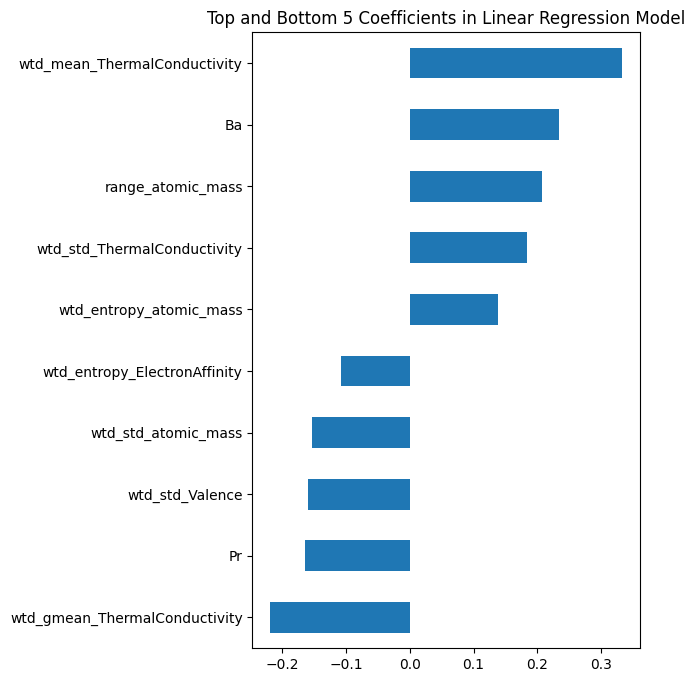

In [205]:

model_coef = pd.Series(lr_coef, index = X_train.columns)
top5_bottom5_coef = pd.concat([model_coef.sort_values().head(5),
                     model_coef.sort_values().tail(5)])

matplotlib.rcParams['figure.figsize'] = (5.0, 8.0)
top5_bottom5_coef.plot(kind = "barh")
plt.title("Top and Bottom 5 Coefficients in Linear Regression Model");

### Test out Ridge Regression model

In [212]:
%%time

from sklearn.linear_model import Ridge
# Grid search for Logistic Regression task 1

lr_ridge_grid={
      "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
      "tol": [0.00001,0.0001,0.001, 0.01, 0.1, 1.0],
      "solver": ['lbfgs'],
      "positive": ['True']
      }

model_ridge=Ridge(random_state = 0)

model_ridge_gs=GridSearchCV(model_ridge,
                       lr_ridge_grid,
                       cv = kfcv,
                       n_jobs=-1,
                       verbose = 1)

model_ridge_gs.fit(X_train,y_train)

print('GridSearchCV Metrics:\n__________________________\n')
print('Tuned hpyerparameters :(best parameters) ',model_ridge_gs.best_params_)
print('Accuracy :',model_ridge_gs.best_score_)
print('\nEnd GridSearchCV Metrics\n__________________________\n')

Fitting 10 folds for each of 54 candidates, totalling 540 fits


/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV Metrics:
__________________________

Tuned hpyerparameters :(best parameters)  {'alpha': 1.0, 'positive': 'True', 'solver': 'lbfgs', 'tol': 1e-05}
Accuracy : 0.6595352179949149

End GridSearchCV Metrics
__________________________

CPU times: user 2.89 s, sys: 1.76 s, total: 4.65 s
Wall time: 6.72 s


In [213]:
%%time

from sklearn.linear_model import Lasso
# Grid search for Logistic Regression task 1

lr_lasso_grid={
      "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
      "tol": [0.00001,0.0001,0.001, 0.01, 0.1, 1.0],
      "selection": ['cyclic','random'],
      "positive": ['True','False']
      }

model_lasso=Lasso(random_state = 0)

model_lasso_gs=GridSearchCV(model_lasso,
                       lr_lasso_grid,
                       cv = kfcv,
                       n_jobs=-1,
                       verbose = 1)

model_lasso_gs.fit(X_train,y_train)

print('GridSearchCV Metrics:\n__________________________\n')
print('Tuned hpyerparameters :(best parameters) ',model_lasso_gs.best_params_)
print('Accuracy :',model_lasso_gs.best_score_)
print('\nEnd GridSearchCV Metrics\n__________________________\n')

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discoura

GridSearchCV Metrics:
__________________________

Tuned hpyerparameters :(best parameters)  {'alpha': 0.001, 'positive': 'True', 'selection': 'cyclic', 'tol': 0.01}
Accuracy : 0.6596985006140349

End GridSearchCV Metrics
__________________________

CPU times: user 2.33 s, sys: 1.1 s, total: 3.43 s
Wall time: 1min 54s
